In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import json
import os
import sys
import matplotlib.pyplot as plt
import math
import skimage.io
import matplotlib
from matplotlib import image

In [9]:
!git clone 'https://github.com/facebookresearch/Detectron.git'

Cloning into 'Detectron'...
remote: Enumerating objects: 1377, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1377 (delta 1), reused 2 (delta 0), pack-reused 1370
Receiving objects: 100% (1377/1377), 4.38 MiB | 18.48 MiB/s, done.
Resolving deltas: 100% (824/824), done.


In [2]:
%%shell
cd Detectron
python setup.py install 

running install
running bdist_egg
running egg_info
writing Detectron.egg-info/PKG-INFO
writing dependency_links to Detectron.egg-info/dependency_links.txt
writing top-level names to Detectron.egg-info/top_level.txt
adding license file 'LICENSE'
adding license file 'NOTICE'
writing manifest file 'Detectron.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/detectron
copying build/lib.linux-x86_64-3.7/detectron/__init__.py -> build/bdist.linux-x86_64/egg/detectron
creating build/bdist.linux-x86_64/egg/detectron/utils
copying build/lib.linux-x86_64-3.7/detectron/utils/cython_nms.cpython-37m-x86_64-linux-gnu.so -> build/bdist.linux-x86_64/egg/detectron/utils
copying build/lib.linux-x86_64-3.7/detectron/utils/cython_bbox.cpython-37m-x86_64-linux-gnu.so -> build/bdist.linux-x86_64/egg/detectron/utils
byte-compiling build/bdist.linux-x86

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [7]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 92.6 MB 83 kB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 367 kB 51.3 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 3.2 MB 36.3 MB/s 
     |████████████████████████████████| 4.1 MB 37.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existi

     |████████████████████████████████| 276 kB 5.0 MB/s 


     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.6.0
    Uninstalling h5py-3.6.0:
      Successfully uninstalled h5py-3.6.0


In [4]:
ROOT_DIR = os.path.abspath("./Dectron/")
# Import Mask RCNN
sys.path.append(ROOT_DIR)
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
sys.path.append("/content/Mask_RCNN/samples/coco")  # To find local version
import coco


In [5]:
path= "/content/drive/MyDrive/coco/model_final.pkl"
if not os.path.exists(path):
    utils.download_trained_weights(path)

In [9]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [10]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [4]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2022-04-13 03:49:55--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.185.115
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.185.115|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  78.8MB/s    in 12s     

2022-04-13 03:50:07 (65.8 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [ ]:
!unzip /content/val2017.zip

In [33]:
image=plt.imread("/content/val2017/000000000139.jpg")

In [34]:
results=model.detect([image], verbose=1)
results[0]

Processing 1 images
image                    shape: (426, 640, 3)         min:    0.00000  max:  239.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  102.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


{'class_ids': array([57, 63, 57, 57, 63, 59, 73,  1, 76, 76, 61, 75, 61, 76, 59,  1, 74,
        61], dtype=int32),
 'masks': array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False

In [21]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

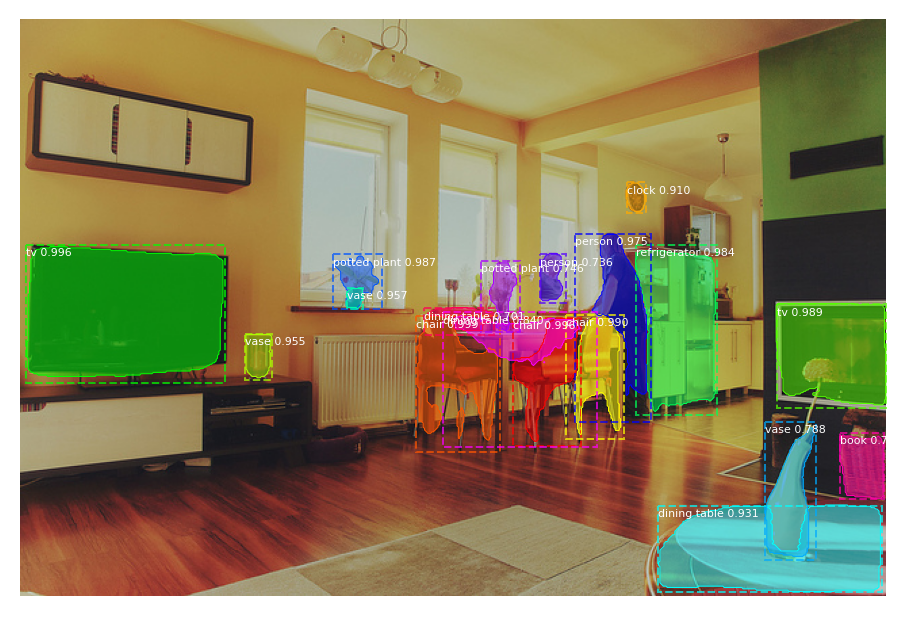

In [35]:
r=results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])